In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# Unzip the dataset file and store it in a folder called images.
# !unzip "/content/drive/MyDrive/RM_Segmentation_Assignment_dataset.zip" -d "/content/drive/MyDrive/images_segm/"

In [34]:
!pip install pycocotools

In [35]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import skimage.io as io
import numpy as np
from sklearn.model_selection import train_test_split


In [36]:
# Path to annotation file
train_ann_path = '/content/drive/MyDrive/images_segm/train-300/labels.json'
train_img_dir = '/content/drive/MyDrive/images_segm/train-300/data/'


In [37]:
# Initialising COCO API for instance annotations.
coco = COCO(train_ann_path)

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


In [38]:
# Extract and display COCO categories and supercategories for the training dataset.

category_IDs = coco.getCatIds()
categories = coco.loadCats(category_IDs)

print(categories)

[{'id': 0, 'name': 'airplane', 'supercategory': 'vehicle'}, {'id': 1, 'name': 'backpack', 'supercategory': 'accessory'}, {'id': 2, 'name': 'banana', 'supercategory': 'food'}, {'id': 3, 'name': 'baseball bat', 'supercategory': 'sports'}, {'id': 4, 'name': 'baseball glove', 'supercategory': 'sports'}, {'id': 5, 'name': 'bear', 'supercategory': 'animal'}, {'id': 6, 'name': 'bench', 'supercategory': 'outdoor'}, {'id': 7, 'name': 'bicycle', 'supercategory': 'vehicle'}, {'id': 8, 'name': 'bird', 'supercategory': 'animal'}, {'id': 9, 'name': 'boat', 'supercategory': 'vehicle'}, {'id': 10, 'name': 'book', 'supercategory': 'indoor'}, {'id': 11, 'name': 'bottle', 'supercategory': 'kitchen'}, {'id': 12, 'name': 'bowl', 'supercategory': 'kitchen'}, {'id': 13, 'name': 'broccoli', 'supercategory': 'food'}, {'id': 14, 'name': 'bus', 'supercategory': 'vehicle'}, {'id': 15, 'name': 'cake', 'supercategory': 'food'}, {'id': 16, 'name': 'car', 'supercategory': 'vehicle'}, {'id': 17, 'name': 'carrot', 'sup

In [39]:
names_catg = [catg["name"] for catg in categories]
print(len(names_catg), "COCO categories:", ", ".join(names_catg))


63 COCO categories: airplane, backpack, banana, baseball bat, baseball glove, bear, bench, bicycle, bird, boat, book, bottle, bowl, broccoli, bus, cake, car, carrot, cat, cell phone, chair, clock, cow, cup, dining table, dog, donut, elephant, fire hydrant, fork, frisbee, giraffe, handbag, horse, hot dog, kite, knife, laptop, motorcycle, oven, parking meter, person, pizza, potted plant, refrigerator, remote, sandwich, scissors, skateboard, skis, spoon, sports ball, stop sign, suitcase, surfboard, tennis racket, tie, traffic light, train, truck, umbrella, vase, wine glass


In [40]:
names_scatg = set([catg["supercategory"] for catg in categories])
print(len(names_scatg), "COCO supercategories:", ", ".join(names_scatg))

12 COCO supercategories: outdoor, indoor, animal, furniture, food, accessory, sports, electronic, appliance, kitchen, person, vehicle


In [41]:
for i in range(len(categories)):
  if categories[i]['name']=='dog':
    print(categories[i]['id'])


25


In [42]:
#catg name from ID
def get_catg_name(catg_id,categories):
  for i in range(len(categories)):
    if catg_id==categories[i]['id']:
      return categories[i]['name']
  return 'None'

In [43]:
get_catg_name(54,categories)

'surfboard'

In [44]:
filter_catg=['dog']
category_IDs = coco.getCatIds(catNms=filter_catg)
image_IDs = coco.getImgIds(catIds=category_IDs)

print(f"Number of images containing specified category(ies): {len(image_IDs)}.")
print(f"IDs of images containing specified category(ies): {image_IDs}.")


Number of images containing specified category(ies): 10.
IDs of images containing specified category(ies): [32, 225, 261, 71, 169, 111, 21, 215, 121, 159].


{'id': 32, 'file_name': '000000002754.jpg', 'height': 480, 'width': 640, 'license': None, 'coco_url': None}


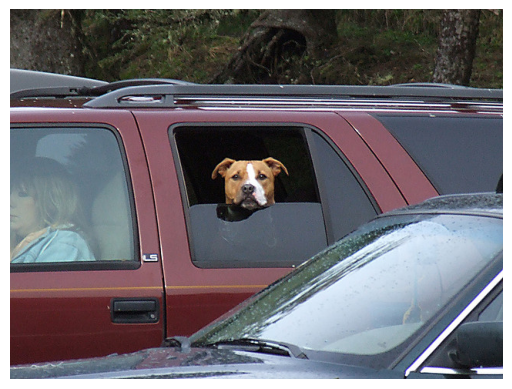

In [45]:
example_image = coco.loadImgs(image_IDs[0])[0]
print(example_image)

image = io.imread(f'{train_img_dir}/{example_image["file_name"]}')
plt.axis("off")
plt.imshow(image)

plt.show()

In [46]:
# Get COCO annotation IDs and content of annotations, i.e., bounding boxes and segmentation masks.

test_image_annotations_ID = coco.getAnnIds(
    imgIds=example_image["id"], catIds=category_IDs, iscrowd=None
)
print(test_image_annotations_ID)

test_image_annotations = coco.loadAnns(test_image_annotations_ID)
print(test_image_annotations)

[353]
[{'id': 353, 'image_id': 32, 'category_id': 25, 'bbox': [252.09, 190.35, 109.71000000000001, 137.54], 'segmentation': [[350.0, 326.5, 251.5, 325.0, 263.5, 289.0, 278.5, 259.0, 281.0, 256.5, 300.5, 258.0, 279.0, 254.5, 277.5, 221.0, 272.0, 215.5, 269.0, 221.5, 261.5, 220.0, 263.5, 207.0, 274.0, 194.5, 286.0, 192.5, 300.0, 195.5, 339.0, 189.5, 357.5, 205.0, 360.0, 214.5, 351.0, 207.5, 348.5, 213.0, 342.5, 216.0, 343.5, 250.0, 330.5, 257.0, 337.0, 255.5, 339.5, 259.0, 341.5, 285.0, 350.0, 326.5], [305.5, 259.0, 301.5, 259.0, 305.5, 259.0]], 'area': 15089.5134, 'iscrowd': 0, 'supercategory': 'animal'}]


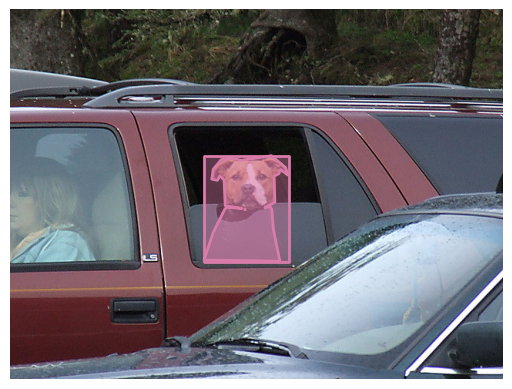

In [47]:
# Load and display test image with instance annotations.

plt.imshow(image)
plt.axis("off")

coco.showAnns(test_image_annotations, draw_bbox=True)

In [48]:
# Extract the training images that contain any combination of the four target classes.

target_classes = ["cake", "car", "dog", "person"]
target_classes_IDs = coco.getCatIds(catNms=target_classes)
training_images = []

# Iterate over each individual class in the list.
for class_name in target_classes:
    # Get all images containing target class.
    print(class_name)
    training_images_categories = coco.getCatIds(catNms=class_name)
    # print(training_images_categories)
    training_images_IDs = coco.getImgIds(catIds=training_images_categories)
    print(training_images_IDs)
    print(len(training_images_IDs))
    training_images += coco.loadImgs(training_images_IDs)

print(f"Number of images with target classes including repetitions: {len(training_images)}.")

cake
[240]
1
car
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 

In [49]:
# Filter out repeated images.
unique_training_images = []

for i in range(len(training_images)):
    if training_images[i] not in unique_training_images:
        unique_training_images.append(training_images[i])

# Shuffle the training data.
random.seed(0)
random.shuffle(unique_training_images)

print(f"Number of unique images in training data containing the target classes: {len(unique_training_images)}")

Number of unique images in training data containing the target classes: 300


{'id': 101, 'file_name': '000000007201.jpg', 'height': 427, 'width': 640, 'license': None, 'coco_url': None}


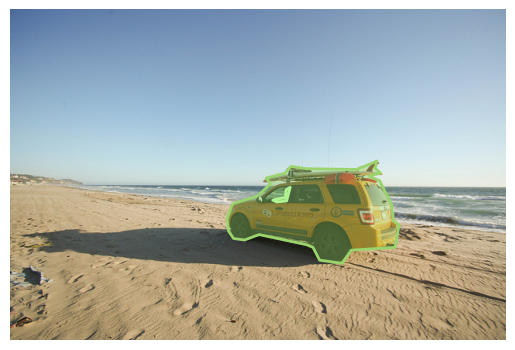

In [50]:
# Load and display example training image with segmentation masks.

training_image = unique_training_images[10]
print(training_image)

image = io.imread(f'{train_img_dir}/{training_image["file_name"]}')
plt.axis("off")
plt.imshow(image)

training_image_annotations_ID = coco.getAnnIds(
    imgIds=training_image["id"], catIds=target_classes_IDs, iscrowd=None)
training_image_annotations = coco.loadAnns(training_image_annotations_ID)
coco.showAnns(training_image_annotations, draw_bbox=False)

plt.show()

In [51]:
# To generate segmentation mask use annToMask function and extract the info stored in the annotations.
# For example, for the first object in our example training image:

mask_example = coco.annToMask(training_image_annotations[0])

print(type(mask_example))
print(mask_example)
print(mask_example.shape)
print(np.max(mask_example))
print(np.min(mask_example))

<class 'numpy.ndarray'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(427, 640)
1
0


Unique pixel values in the mask: [0. 3.]


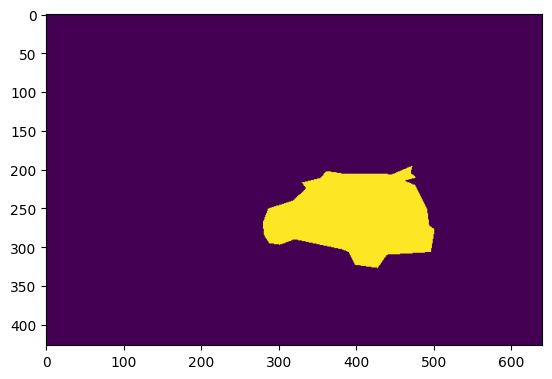

In [52]:
# Plotting the segmentation masks with different colours.
# There are many ways to do this. This is just one example.

mask = np.zeros((training_image["height"], training_image["width"]))

for i in range(len(training_image_annotations)):
    # Get object category name.
    object_category = get_catg_name(
        training_image_annotations[i]["category_id"], categories)

    # Assign pixel value based on location in target_classes list.
    pixel_value = target_classes.index(object_category) + 1
    # Assign pixel value to mask based on annToMask output.
    mask = np.maximum(coco.annToMask(training_image_annotations[i]) * 3, mask)

print(f"Unique pixel values in the mask: {np.unique(mask)}")

plt.imshow(mask)
plt.show()


**Model**

In [53]:
import torch
import torch.nn as nn
import torchvision
import torchvision.models as models
import torchvision.transforms as T
from PIL import Image
from torchvision.transforms import ToTensor


In [54]:
!pip install segmentation_models_pytorch


In [55]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import cv2
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import segmentation_models_pytorch as smp
import albumentations as A
from albumentations.pytorch import ToTensorV2


# --- COCO Setup ---
coco = COCO(train_ann_path)
target_classes = ["cake", "car", "dog", "person"]
cat_ids = coco.getCatIds(catNms=target_classes)
catid2index = {cat_id: i+1 for i, cat_id in enumerate(cat_ids)}  # 0 = background

# --- Get Image IDs ---
image_ids = []
for cat in target_classes:
    image_ids += coco.getImgIds(catIds=coco.getCatIds(catNms=[cat]))
image_ids = list(set(image_ids))  # unique



loading annotations into memory...
Done (t=0.06s)
creating index...
index created!


In [56]:
# Use a random state for reproducibility
train_image_ids, val_image_ids = train_test_split(image_ids, test_size=0.2, random_state=42)

print(f"Total unique images: {len(image_ids)}")
print(f"Training images: {len(train_image_ids)}")
print(f"Validation images: {len(val_image_ids)}")



Total unique images: 300
Training images: 240
Validation images: 60


In [57]:
# --- Albumentations Transforms ---
transform = A.Compose([
    A.Resize(256, 256),
    A.Normalize(),
    ToTensorV2()
])


# --- Dataset Function ---
def load_data(image_id):
    img_info = coco.loadImgs(image_id)[0]
    img_path = os.path.join(train_img_dir, img_info['file_name'])
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    ann_ids = coco.getAnnIds(imgIds=image_id, catIds=cat_ids)
    anns = coco.loadAnns(ann_ids)

    mask = np.zeros((img_info["height"], img_info["width"]), dtype=np.uint8)
    for ann in anns:
        mask = np.maximum(mask, coco.annToMask(ann) * catid2index[ann['category_id']])

    augmented = transform(image=image, mask=mask)
    return augmented['image'], augmented['mask'].long()



In [58]:
# --- DataLoader ---
class SimpleDataset(Dataset):
    def __init__(self, ids): self.ids = ids
    def __len__(self): return len(self.ids)
    def __getitem__(self, idx): return load_data(self.ids[idx])
train_dataset = SimpleDataset(train_image_ids)
val_dataset = SimpleDataset(val_image_ids)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False) # No need to shuffle validation data

# --- U-Net with pretrained encoder (transfer learning) ---
model = smp.Unet(
    encoder_name='resnet34',
    encoder_weights='imagenet',
    in_channels=3,
    classes=5  # 4 classes + background
).cuda()

# --- Loss & Optimizer ---
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)



In [ ]:
# --- Training Loop ---
best_val_loss = float('inf') # To save the best model

for epoch in range(12):  # Or more epochs, as needed
    # --- Training Phase ---
    model.train()
    train_loss = 0
    for img, mask in train_loader: # Use train_loader
        img, mask = img.cuda(), mask.cuda()
        out = model(img)
        loss = loss_fn(out, mask)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    avg_train_loss = train_loss / len(train_loader)
    print(f"Epoch {epoch+1}, Train Loss: {avg_train_loss:.4f}")
    # --- Validation Phase ---
    model.eval() # Set model to evaluation mode
    val_loss = 0
    with torch.no_grad(): # Disable gradient calculations for validation
        for img, mask in val_loader: # Use val_loaderb
            img, mask = img.cuda(), mask.cuda()
            out = model(img)
            loss = loss_fn(out, mask)
            val_loss += loss.item()
    avg_val_loss = val_loss / len(val_loader)
    print(f"Epoch {epoch+1}, Validation Loss: {avg_val_loss:.4f}")

    # --- Optional: Save best model based on validation loss ---
    if avg_val_loss < best_val_loss:
        print(f"Validation loss improved from {best_val_loss:.4f} to {avg_val_loss:.4f}. Saving model...")
        best_val_loss = avg_val_loss
        # You might want to save the model to Google Drive
        # torch.save(model.state_dict(), '/content/drive/MyDrive/best_segmentation_model.pth')

Epoch 1, Train Loss: 1.8258
Epoch 1, Validation Loss: 1.6152
Validation loss improved from inf to 1.6152. Saving model...


In [ ]:
# test_transforms = transforms.Compose([
#     transforms.Resize((256, 256)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Adjust if needed
#                          std=[0.229, 0.224, 0.225])
# ])

# test_dataset = TestImageDataset(
#     image_dir="/content/drive/MyDrive/images_segm/test/images",
#     transform=test_transforms
# )

# test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)


In [ ]:
# import torch
# import os
# from PIL import Image
# import numpy as np

# output_dir = "/content/drive/MyDrive/images_segm/test/predictions"
# os.makedirs(output_dir, exist_ok=True)

# model.eval()
# model.cuda()

# with torch.no_grad():
#     for img, img_name in test_loader:
#         img = img.cuda()
#         output = model(img)  # Shape: [1, 1, H, W]
#         prob = torch.sigmoid(output)  # Convert logits to probabilities
#         pred_mask = (prob > 0.5).float().squeeze().cpu().numpy()  # Binary mask: 0 or 1

#         # Convert to uint8 and scale to 0-255 for saving
#         pred_mask = (pred_mask * 255).astype(np.uint8)
#         pred_img = Image.fromarray(pred_mask)
#         pred_img.save(os.path.join(output_dir, img_name[0].replace('.jpg', '_mask.png')))


In [ ]:
# model.eval()
# with torch.no_grad():
#     img, mask = load_data(image_ids[6])
#     pred = model(img.unsqueeze(0).cuda())
#     pred_mask = torch.argmax(pred.squeeze(), dim=0).cpu().numpy()

# plt.subplot(1, 3, 1)
# plt.title("Image")
# plt.imshow(img.permute(1, 2, 0))

# plt.subplot(1, 3, 2)
# plt.title("Ground Truth")
# plt.imshow(mask, cmap='jet')

# plt.subplot(1, 3, 3)
# plt.title("Prediction")
# plt.imshow(pred_mask, cmap='jet')
# plt.show()


In [ ]:
# # Split dataset into 80% train, 20% test
# from sklearn.model_selection import train_test_split
# train_ids, test_ids = train_test_split(image_ids, test_size=0.2, random_state=42)

# train_dataset = SimpleDataset(train_ids)
# test_dataset = SimpleDataset(test_ids)

# train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
# # Only keep test images that contain at least one of the 4 classes
# test_ids_filtered = [img_id for img_id in test_ids
#                      if len(set([a['category_id'] for a in coco.loadAnns(coco.getAnnIds(imgIds=img_id))])
#                             & set(cat_ids)) > 0]

# test_dataset = SimpleDataset(test_ids_filtered)
# test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)




In [ ]:
# def compute_metrics(pred_mask, true_mask, num_classes=5):
#     ious = []
#     for cls in range(1, num_classes):  # skip background (0)
#         pred_inds = pred_mask == cls
#         target_inds = true_mask == cls
#         intersection = (pred_inds & target_inds).sum()
#         union = (pred_inds | target_inds).sum()
#         if union == 0:
#             ious.append(np.nan)
#         else:
#             ious.append(intersection / union)
#     return ious


In [ ]:
# model.eval()
# ious_all = []

# with torch.no_grad():
#     for img, mask in test_loader:
#         img = img.cuda()
#         pred = model(img)
#         pred_mask = torch.argmax(pred.squeeze(), dim=0).cpu().numpy()
#         true_mask = mask.squeeze().numpy()
#         ious = compute_metrics(pred_mask, true_mask, num_classes=5)
#         ious_all.append(ious)

# # Calculate mean IoU per class
# ious_all = np.array(ious_all)
# mean_ious = np.nanmean(ious_all, axis=0)
# class_names = ["cake", "car", "dog", "person"]

# for i, name in enumerate(class_names):
#     print(f"IoU for {name}: {mean_ious[i]*100:.2f}%")

# print(f"Mean IoU (mIoU): {np.nanmean(mean_ious)*100:.2f}%")


In [ ]:
# import matplotlib.pyplot as plt

# img, mask = test_dataset[5]
# model.eval()
# with torch.no_grad():
#     pred = model(img.unsqueeze(0).cuda())
#     pred_mask = torch.argmax(pred.squeeze(), dim=0).cpu().numpy()

# plt.figure(figsize=(12, 4))
# plt.subplot(1, 3, 1)
# plt.title("Input")
# plt.imshow(img.permute(1, 2, 0))

# plt.subplot(1, 3, 2)
# plt.title("Ground Truth")
# plt.imshow(mask, cmap="jet")

# plt.subplot(1, 3, 3)
# plt.title("Prediction")
# plt.imshow(pred_mask, cmap="jet")
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import torch
# import numpy as np

# model.eval()

# def visualize_test_predictions(dataset, model, num_samples=5):
#     for i in range(num_samples):
#         image, true_mask = dataset[i]

#         # Move image to GPU, get prediction
#         image_input = image.unsqueeze(0).cuda()  # add batch dim
#         with torch.no_grad():
#             pred_mask_logits = model(image_input)
#         pred_mask = torch.argmax(pred_mask_logits.squeeze(), dim=0).cpu().numpy()

#         # Convert tensors to numpy
#         image_np = image.permute(1, 2, 0).cpu().numpy()
#         true_mask_np = true_mask.cpu().numpy()

#         # Plot
#         plt.figure(figsize=(12, 4))

#         plt.subplot(1, 3, 1)
#         plt.title("Input Image")
#         plt.imshow(image_np)
#         plt.axis('off')

#         plt.subplot(1, 3, 2)
#         plt.title("Ground Truth Mask")
#         plt.imshow(true_mask_np, cmap='jet', vmin=0, vmax=4)
#         plt.axis('off')

#         plt.subplot(1, 3, 3)
#         plt.title("Predicted Mask")
#         plt.imshow(pred_mask, cmap='jet', vmin=0, vmax=4)
#         plt.axis('off')

#         plt.tight_layout()
#         plt.show()

# # Show 5 test samples
# visualize_test_predictions(test_dataset, model, num_samples=5)
